In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

In [ ]:
dt = pd.read_csv('/content/Land mines.csv')
dt.head()

,voltage,high,soil_type,mine_type
0,0.338157,0.000000,1,1
1,0.320241,0.181818,1,1
2,0.287009,0.272727,1,1
3,0.256284,0.454545,1,1
4,0.262840,0.545455,1,1


In [ ]:
data = dt.drop(['mine_type'], axis=1)
data.head()

,voltage,high,soil_type
0,0.338157,0.000000,1
1,0.320241,0.181818,1
2,0.287009,0.272727,1
3,0.256284,0.454545,1
4,0.262840,0.545455,1


In [ ]:
missingdata = data.isnull().sum()
missingdata

voltage      0
high         0
soil_type    0
dtype: int64

In [ ]:
print(data[data.duplicated(keep=False)])

Empty DataFrame
Columns: [voltage, high, soil_type]
Index: []


In [ ]:
scaler = StandardScaler()
datascale = scaler.fit_transform(data)

print(datascale[:5])

[[-0.47296024 -1.665222   -1.46494169]
 [-0.56458558 -1.07024839 -1.46494169]
 [-0.73454789 -0.77276158 -1.46494169]
 [-0.89168625 -0.17778797 -1.46494169]
 [-0.85815684  0.11969883 -1.46494169]]


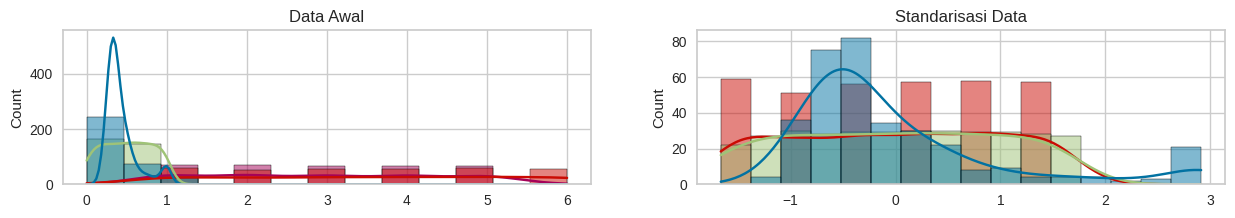

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(15, 2))
sns.histplot(dt, ax=ax[0], kde=True, legend=False)
ax[0].set_title("Data Awal")
sns.histplot(datascale, ax=ax[1], kde=True, legend=False)
ax[1].set_title("Standarisasi Data")
plt.show()

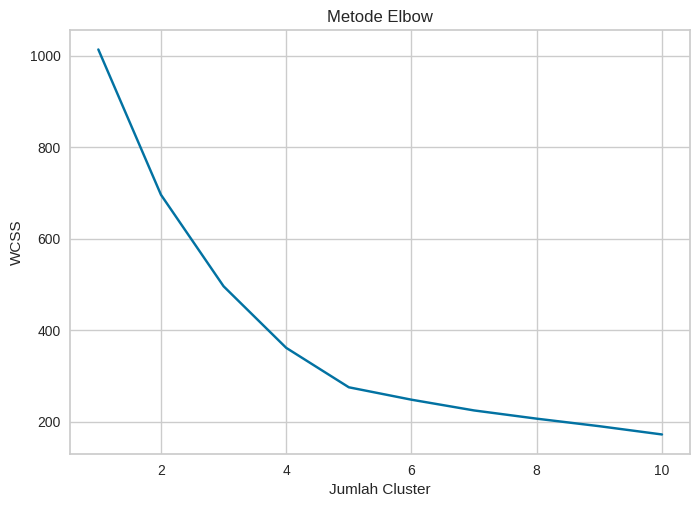

In [ ]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=10, random_state=42)
    kmeans.fit(datascale)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Metode Elbow')
plt.xlabel('Jumlah Cluster')
plt.ylabel('WCSS')
plt.show()

In [ ]:
X_numerics = dt[['voltage', 'high', 'soil_type']]

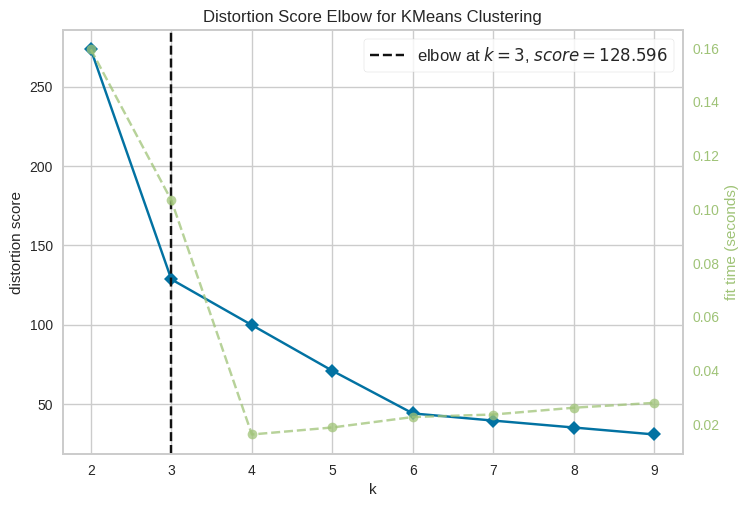

In [ ]:
model = KMeans(n_init=10, random_state=42)
visualizer = KElbowVisualizer(model, k=(2, 10))

visualizer.fit(X_numerics)
visualizer.show()
plt.show()

In [ ]:
KM_2_clusters = KMeans(n_clusters=3, init='k-means++', n_init=10).fit(X_numerics)

KM2_clustered = X_numerics.copy()
KM2_clustered.loc[:,'Cluster'] = KM_2_clusters.labels_

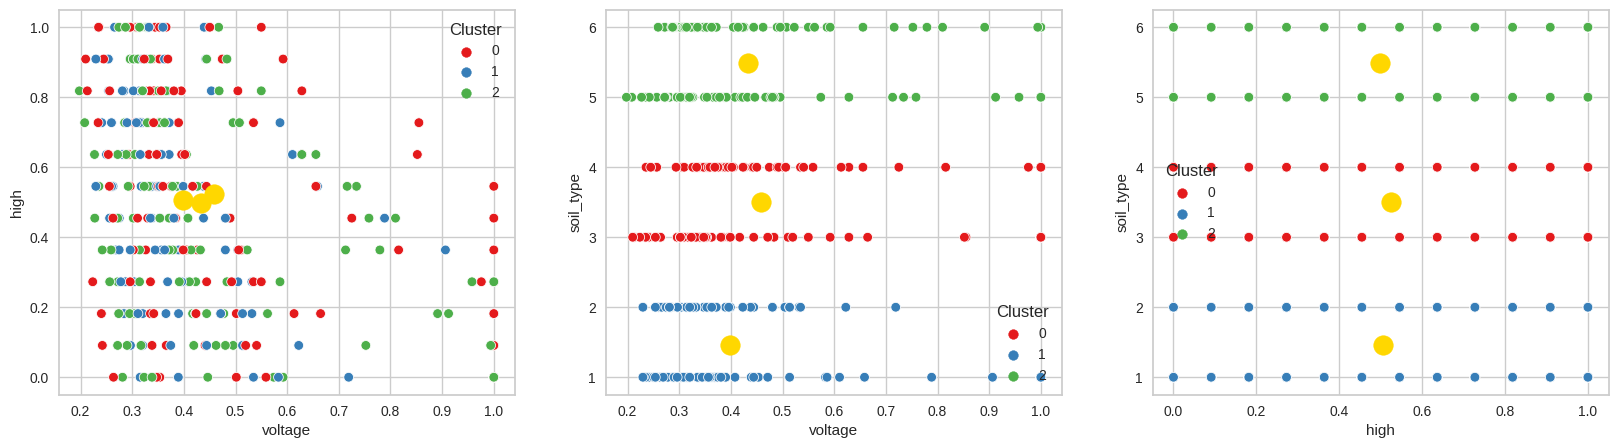

In [ ]:
fig1, axes = plt.subplots(1, 3, figsize=(20, 5))

sns.scatterplot(x='voltage', y='high', data=KM2_clustered,
                hue='Cluster', palette='Set1', ax=axes[0], legend='full')

sns.scatterplot(x='voltage', y='soil_type', data=KM2_clustered,
                hue='Cluster', palette='Set1', ax=axes[1], legend='full')

sns.scatterplot(x='high', y='soil_type', data=KM2_clustered,
                hue='Cluster', palette='Set1', ax=axes[2], legend='full')

axes[0].scatter(KM_2_clusters.cluster_centers_[:,0],KM_2_clusters.cluster_centers_[:,1], marker='o', s=200, c="gold")
axes[1].scatter(KM_2_clusters.cluster_centers_[:,0],KM_2_clusters.cluster_centers_[:,2], marker='o', s=200, c="gold")
axes[2].scatter(KM_2_clusters.cluster_centers_[:,1],KM_2_clusters.cluster_centers_[:,2], marker='o', s=200, c="gold")
plt.show()


In [ ]:
KM_2_clusters = KMeans(n_clusters=5, init='k-means++', n_init=10).fit(X_numerics)

KM2_clustered = X_numerics.copy()
KM2_clustered.loc[:,'Cluster'] = KM_2_clusters.labels_

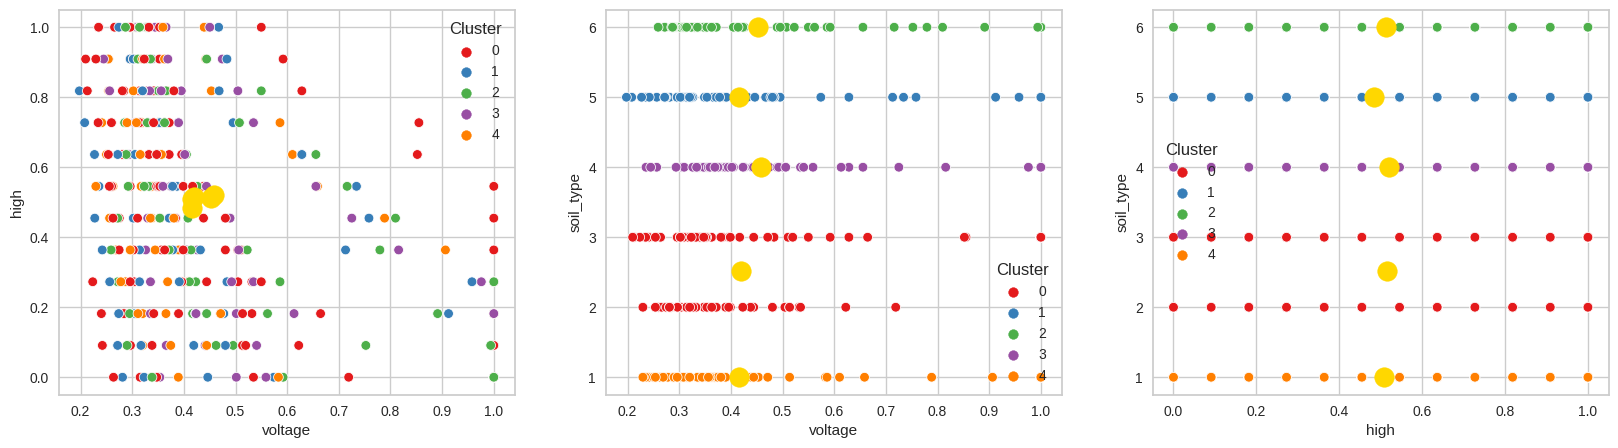

In [ ]:
fig1, axes = plt.subplots(1, 3, figsize=(20, 5))

sns.scatterplot(x='voltage', y='high', data=KM2_clustered,
                hue='Cluster', palette='Set1', ax=axes[0], legend='full')

sns.scatterplot(x='voltage', y='soil_type', data=KM2_clustered,
                hue='Cluster', palette='Set1', ax=axes[1], legend='full')

sns.scatterplot(x='high', y='soil_type', data=KM2_clustered,
                hue='Cluster', palette='Set1', ax=axes[2], legend='full')

axes[0].scatter(KM_2_clusters.cluster_centers_[:,0],KM_2_clusters.cluster_centers_[:,1], marker='o', s=200, c="gold")
axes[1].scatter(KM_2_clusters.cluster_centers_[:,0],KM_2_clusters.cluster_centers_[:,2], marker='o', s=200, c="gold")
axes[2].scatter(KM_2_clusters.cluster_centers_[:,1],KM_2_clusters.cluster_centers_[:,2], marker='o', s=200, c="gold")
plt.show()

In [ ]:
KM_clust_sizes = KM2_clustered.groupby('Cluster').size().to_frame()
KM_clust_sizes.columns = ["KM_size"]
KM_clust_sizes

,KM_size
Cluster,
0,107
1,58
2,57
3,57
4,59


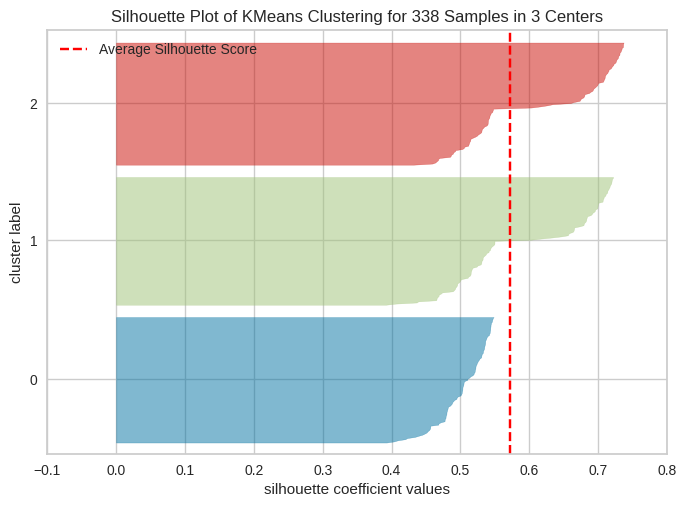

In [ ]:
model = KMeans(n_clusters=3, n_init=10, random_state=0)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')
visualizer.fit(X_numerics)
visualizer.show()
plt.show()

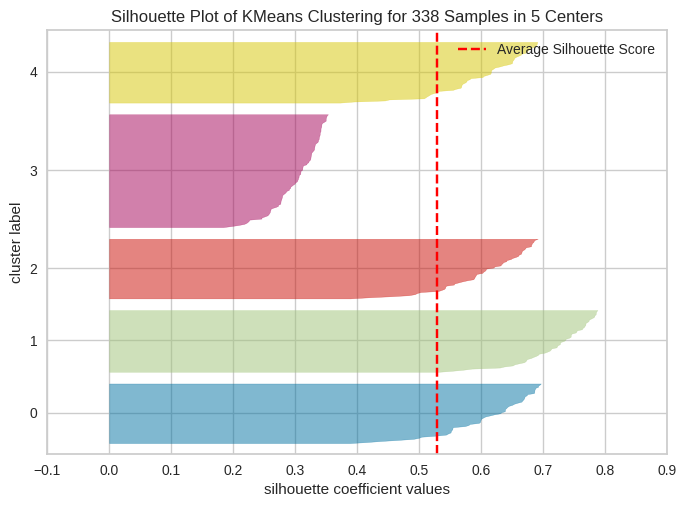

In [ ]:
model = KMeans(n_clusters=5, n_init=10, random_state=0)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')
visualizer.fit(X_numerics)
visualizer.show()
plt.show()

In [ ]:
KM2_clustered ['Cluster'] = kmeans.labels_

cluster_summary = KM2_clustered .groupby('Cluster').mean()
cluster_summary.head()

,voltage,high,soil_type
Cluster,,,
0,0.330584,0.430155,1.951220
1,0.980793,0.123377,4.714286
2,0.353545,0.827853,3.510638
3,0.333072,0.810277,1.456522
4,0.438432,0.147727,1.975000


In [ ]:
slht_scr_kmeans = sklearn.metrics.silhouette_score(datascale, kmeans.labels_)
slht_scr_kmeans

0.2835304813101716